In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Imgs_dummy_xz, Imgs_dummy_yz = np.load('../data/train_imgs_seperate.npy', allow_pickle=True)
labels_dummy = np.load('../data/train_label.npy')

Imgs_xz = Imgs_dummy_xz[np.where(labels_dummy!=-1)[0]]
Imgs_yz = Imgs_dummy_yz[np.where(labels_dummy!=-1)[0]]
labels = labels_dummy[np.where(labels_dummy!=-1)[0]]

l = []
for i in range(len(labels)):
    l.append([labels[i], int(not labels[i])])
l = np.array(l)

In [3]:
X = Imgs_xz
y = labels

img_rows, img_cols = X[0].shape
input_shape = (img_rows, img_cols, 1)

X = X.reshape(X.shape[0], img_rows, img_cols, 1)
X = X.astype('float32')

shuffler = np.random.permutation(len(X))
X_new = X[shuffler]
y_new = y[shuffler]

test_size = int(len(X)*0.1)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_new[:-test_size], y_new[:-test_size], test_size=0.2, shuffle=False)
X_test = X_new[-test_size:]
y_test = y_new[-test_size:]


In [4]:
X_train.shape

(36452, 50, 20, 1)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2)),
  #layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(64, activation='sigmoid'),
  #layers.Dropout(0.2),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [8]:
#Train
epochs = 10
history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))


Epoch 1/10
570/570 [==============================] - 30s 52ms/step - loss: 0.5883 - accuracy: 0.7194 - val_loss: 5.8383 - val_accuracy: 0.6171
Epoch 2/10
570/570 [==============================] - 26s 46ms/step - loss: 6.0157 - accuracy: 0.6055 - val_loss: 5.8383 - val_accuracy: 0.6171
Epoch 3/10
570/570 [==============================] - 24s 42ms/step - loss: 6.0638 - accuracy: 0.6024 - val_loss: 5.8383 - val_accuracy: 0.6171
Epoch 4/10
570/570 [==============================] - 25s 43ms/step - loss: 6.1131 - accuracy: 0.5991 - val_loss: 5.8383 - val_accuracy: 0.6171
Epoch 5/10
570/570 [==============================] - 26s 46ms/step - loss: 6.0245 - accuracy: 0.6049 - val_loss: 5.8383 - val_accuracy: 0.6171
Epoch 6/10
570/570 [==============================] - 25s 44ms/step - loss: 6.0386 - accuracy: 0.6040 - val_loss: 5.8383 - val_accuracy: 0.6171
Epoch 7/10
570/570 [==============================] - 24s 42ms/step - loss: 6.0525 - accuracy: 0.6031 - val_loss: 5.8383 - val_accuracy:

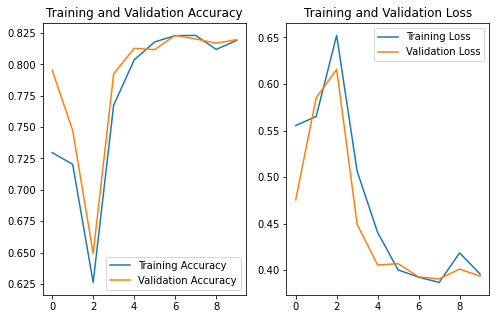

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
predicted_res = model.predict(X_test)
predicted_classes = 


In [59]:
predicted_res

array([[ 4.224887  ],
       [-2.3634708 ],
       [ 1.2083367 ],
       ...,
       [-0.10159735],
       [ 1.8776287 ],
       [ 3.3760586 ]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

